In [3]:
import pandas as pd
import sqlalchemy
from matplotlib import pyplot as plt
import datetime
import copy
import numpy as np
from scipy.stats import stats
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv(
    '/home/memari/jhu_centering/tables/calls_cleaned.csv')
df


,device_id,date,incoming_time,incoming_freq,outgoing_time,outgoing_freq,missing_time,missing_freq
0,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-19,625.0,3,24.0,2,0.0,0
1,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-20,1876.0,7,1830.0,14,1176.0,2
2,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-21,5157.0,10,803.0,3,0.0,0
3,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-22,1403.0,4,335.0,16,954.0,2
4,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-23,4783.0,6,996.0,4,0.0,0
...,...,...,...,...,...,...,...,...
2584,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-27,29.0,1,1285.0,5,0.0,0
2585,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-28,0.0,0,1795.0,3,0.0,0
2586,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-29,0.0,0,911.0,6,0.0,0
2587,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-30,13.0,1,330.0,3,0.0,0


In [ ]:
df_group = pd.read_csv('/data/meditation/majid/surveys/0.csv',
                       skiprows=[1, 2])[['Study ID', 'Group']]
df_group.columns = ['survey_id', 'group']


In [ ]:
df_group


,survey_id,group
0,29872387,Passive Control
1,7053820,Active Control
2,64399346,Experimental Condition
3,41845827,Passive Control
4,38737963,Experimental Condition
...,...,...
1766,28859007,Experimental Condition
1767,25569345,Active Control
1768,96827593,Passive Control
1769,19859888,Active Control


In [ ]:
df_id = pd.read_csv('/home/memari/jhu_centering/tables/id.csv')


In [ ]:
df_group = df_id.merge(df_group, on='survey_id', how='left')


In [ ]:
df_group.rename(columns={'device_id1': 'device_id'}, inplace=True)


In [ ]:
df_group


,device_id,survey_id,device_id2,group_x,group_y
0,4a23c5dc-9a50-4d46-a12d-dd94ee98270f,8415477,NaN,Experimental Condition,Experimental Condition
1,f3845ba4-8702-42cf-a14f-051c46f66b61,15027959,NaN,Active Control,Active Control
2,ae02314b-a607-41b9-9507-28ffa1babed7,73386307,NaN,Active Control,Active Control
3,b460f89e-fd76-46ff-a960-989d74fcb66a,87785016,NaN,Active Control,Active Control
4,e5048fab-dc20-4d99-8cea-220a5a2750e0,14851895,NaN,Passive Control,Passive Control
...,...,...,...,...,...
70,780c9b18-72d3-4714-858d-3c91b3719155,21788465,NaN,Active Control,Active Control
71,a1118578-bbb4-47ef-b784-7d5bd09ad8b5,7389236,NaN,Passive Control,Passive Control
72,00e17b8a-4b0f-4230-bd26-3df2853e8916,69546645,NaN,Experimental Condition,Experimental Condition
73,029e57cb-fa0d-479d-abd2-9cb5745f219d,72690342,NaN,Passive Control,Passive Control


In [ ]:
df_plot = df.merge(df_group[['device_id', 'group_x']],
                   on='device_id', how='left')


In [ ]:
df_plot


,device_id,date,incoming_time,incoming_freq,outgoing_time,outgoing_freq,missing_time,missing_freq,group_x
0,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-19,625.0,3,24.0,2,0.0,0,Experimental Condition
1,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-20,1876.0,7,1830.0,14,1176.0,2,Experimental Condition
2,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-21,5157.0,10,803.0,3,0.0,0,Experimental Condition
3,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-22,1403.0,4,335.0,16,954.0,2,Experimental Condition
4,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-23,4783.0,6,996.0,4,0.0,0,Experimental Condition
...,...,...,...,...,...,...,...,...,...
2584,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-27,29.0,1,1285.0,5,0.0,0,Experimental Condition
2585,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-28,0.0,0,1795.0,3,0.0,0,Experimental Condition
2586,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-29,0.0,0,911.0,6,0.0,0,Experimental Condition
2587,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-30,13.0,1,330.0,3,0.0,0,Experimental Condition


In [ ]:
df_plot = df_plot[['date', 'group_x', 'incoming_time', 'outgoing_time',
                   'missing_time', 'incoming_freq', 'outgoing_freq', 'missing_freq']]


In [ ]:
grouped = df_plot.groupby(['group_x'])


In [ ]:
df_dict = {group: data for group, data in grouped}


In [ ]:
active_control = df_dict['Active Control']
experimental_condition = df_dict['Experimental Condition']
passive_control = df_dict['Passive Control']


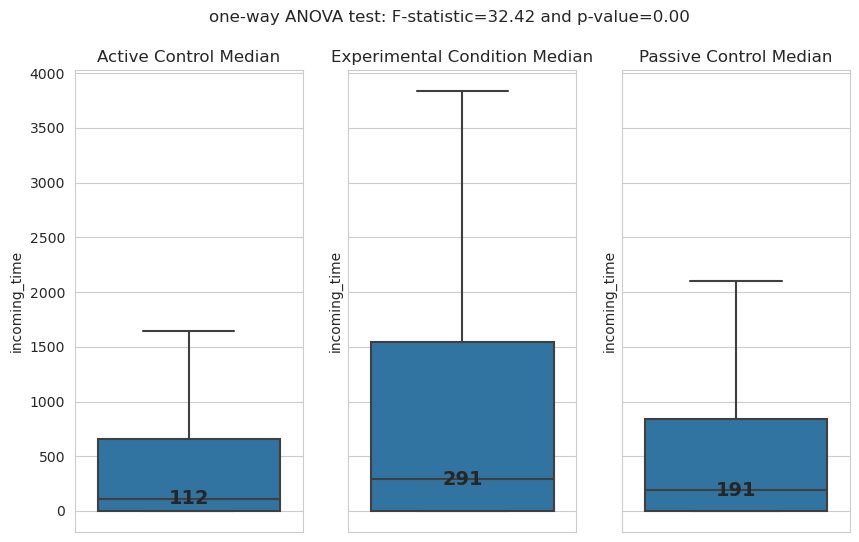

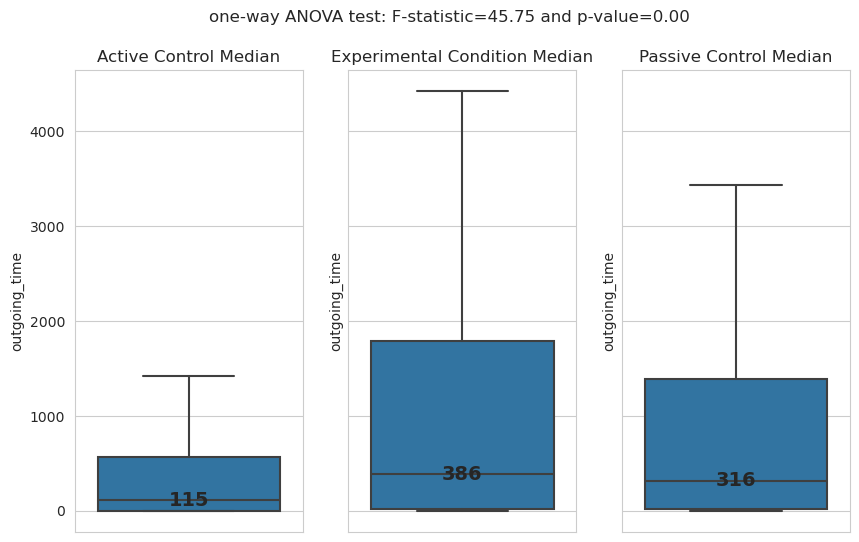

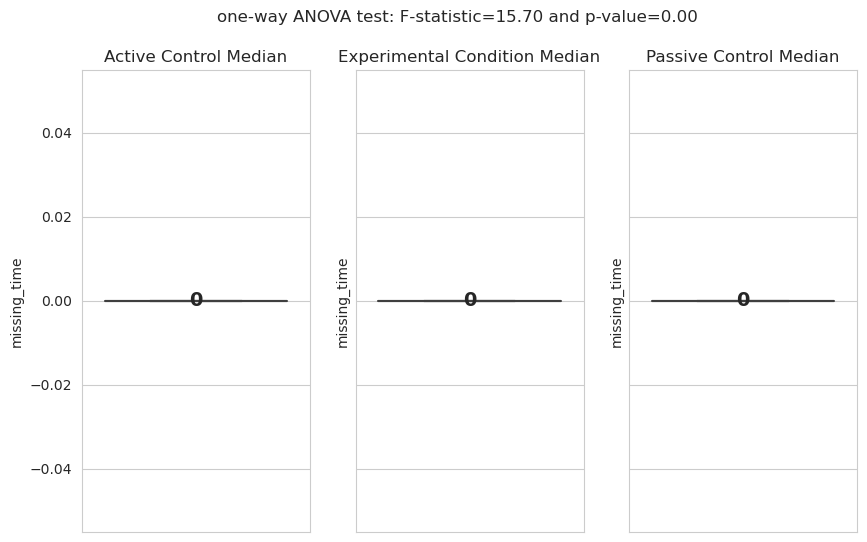

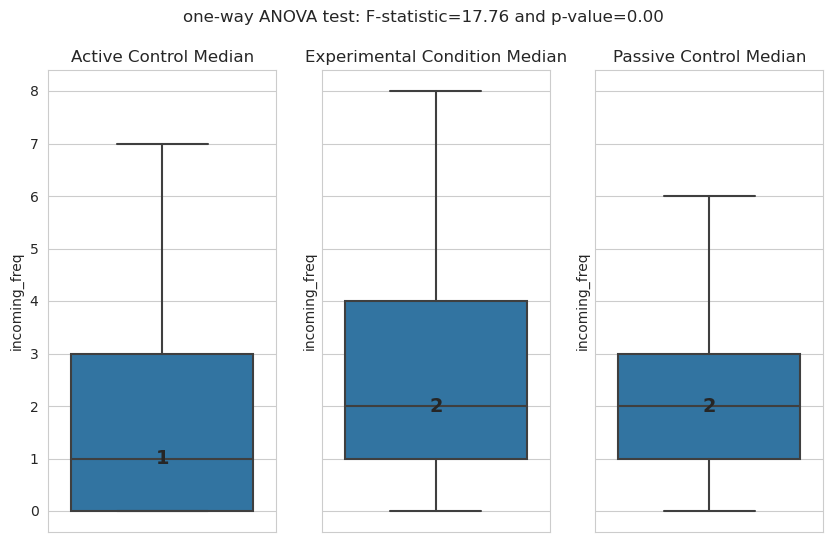

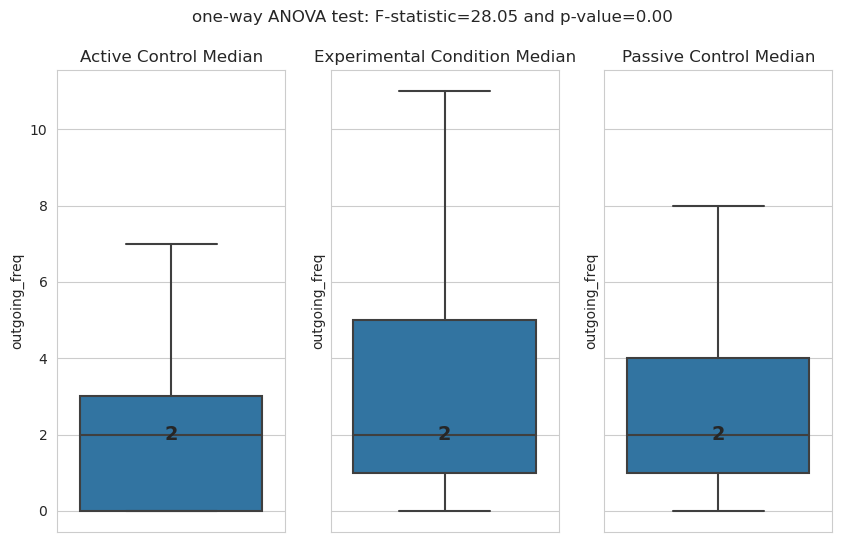

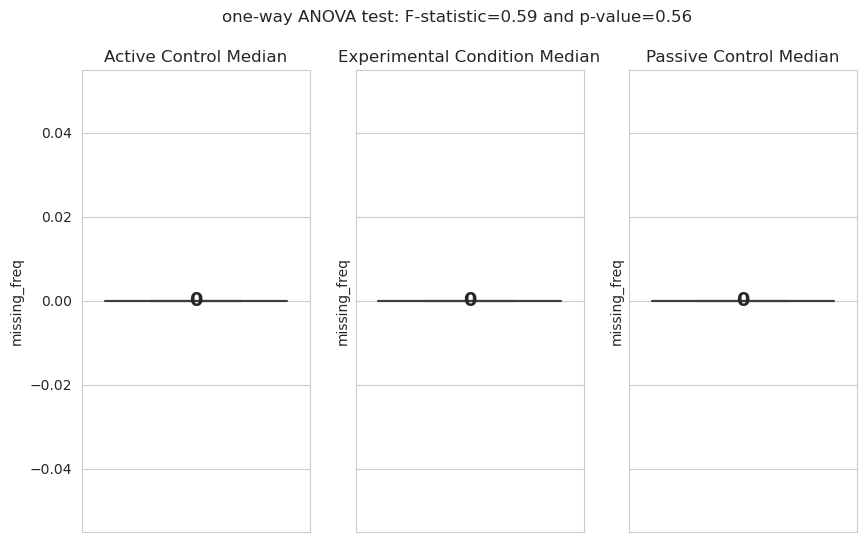

In [ ]:
from scipy.stats import stats
clm = 'incoming_time'
mylist = ['incoming_time', 'outgoing_time', 'missing_time',
          'incoming_freq', 'outgoing_freq', 'missing_freq']
for clm in mylist:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 6), sharey=True)
    sns.boxplot(y=active_control[clm], orient="v", showfliers=False, ax=ax1)
    sns.boxplot(y=experimental_condition[clm],
                orient="v", showfliers=False, ax=ax2)
    sns.boxplot(y=passive_control[clm], orient="v", showfliers=False, ax=ax3)

    ax1.set_title("Active Control Median")
    m1 = int(active_control[clm].median())
    ax1.text(0, m1, m1, ha='center', va='center',
             fontsize=14, fontdict={'fontweight': 'bold'})
    m2 = int(experimental_condition[clm].median())
    ax2.set_title("Experimental Condition Median")
    ax2.text(0, m2, m2, ha='center', va='center',
             fontsize=14, fontdict={'fontweight': 'bold'})
    m3 = int(passive_control[clm].median())
    ax3.set_title("Passive Control Median")
    ax3.text(0, m3, m3, ha='center', va='center',
             fontsize=14, fontdict={'fontweight': 'bold'})

    stat, p = stats.f_oneway(
        active_control[clm], experimental_condition[clm], passive_control[clm])
    mytext = 'one-way ANOVA test: F-statistic={:.2f} and p-value={:.2f}'.format(
        stat, p)
    plt.suptitle(mytext)
    plt.show()
